# Notebook to obtain the results using the quantum Lorentz force

### Import the simulation results

In [1]:
# We create a list with the files to read

Nevs = 100; Nc = 3

file_list = [['/home2/carlos.lamas/qJetLFH_vQM/output/LorentzSquaredResults/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_10.000000_wy_10.000000_cQ_%i_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_1_Nperp_64_Leta_0.250000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_exp_sq_autonomy.dat' %(nev, nc) for nev in range(Nevs)] for nc in range(1, Nc+1)]

In [2]:
# We convert to an array of DataFrames

import pandas as pd 
import numpy as np

df_list = []

for i in range(Nevs):
    df = [pd.read_table(file_list[c][i], header = None) for c in range(Nc)]
    df_list.append(df)

data = np.array(df_list)

In [3]:
print(np.shape(data))

(100, 3, 33, 12)


### Get the momentum broadening

In [4]:
# Load the relevant parameters

L = 1         
N = 128 
hbarc = 0.197327 # GeV fm

E0 = N / L * hbarc

In [5]:
# Average over color and events

data_avg = np.mean(data, axis=(0, 1))

In [6]:
# Get momentum broadening

xplus = data_avg[:, 0]

pz2 = data_avg[:, 3] # *E0**2
py2 = data_avg[:, 8]# *E0**2

### Import the classical jet results

In [7]:

xp = np.loadtxt('ClassicalResults/classical_pi.txt')[0]

piy = np.loadtxt('ClassicalResults/classical_pi.txt')[1]
piz = np.loadtxt('ClassicalResults/classical_pi.txt')[2]

### Plot the results


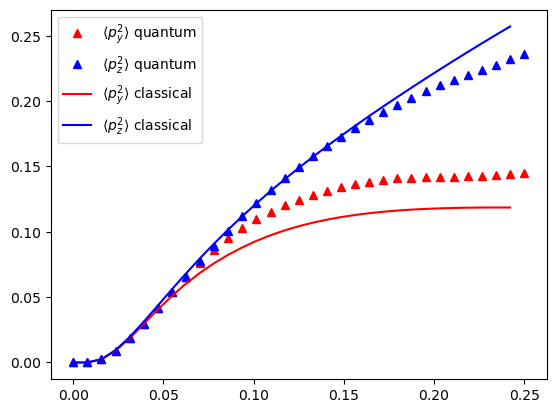

In [8]:
import matplotlib.pyplot as plt

plt.plot(xplus, py2, 'r^', label = r'$\langle p_y^2 \rangle$ quantum')
plt.plot(xplus, pz2, 'b^', label = r'$\langle p_z^2 \rangle $ quantum')

plt.plot(xp, piy/3, 'r-', label = r'$\langle p_y^2 \rangle$ classical')
plt.plot(xp, piz/3, 'b-', label = r'$\langle p_z^2 \rangle$ classical')

plt.legend()

plt.savefig('ResultsLorentz.png')

### Debug

In [27]:
print(np.shape(piy))
print(np.shape(py2))

(32,)
(33,)


In [28]:
R_y = piy/py2[1:]
R_z = piz/pz2[1:]

print(R_y)
print(R_z)

[       nan 0.         0.77144791 1.3942435  1.79293141 2.07164832
 2.27833768 2.43395057 2.54749462 2.62195976 2.66058734 2.67187566
 2.66799147 2.65928511 2.65148758 2.6468734  2.64592792 2.64770588
 2.65055688 2.65343531 2.6556326  2.656044   2.65385167 2.64966025
 2.64512174 2.64172251 2.64075219 2.64364104 2.65099204 2.66112051
 2.67025807 2.67475078]
[       nan 0.         0.86690324 1.56081934 1.99974238 2.30808842
 2.54318486 2.7282136  2.87338319 2.98547316 3.07137725 3.13922983
 3.19656584 3.24716481 3.29045516 3.32507578 3.35230558 3.37466293
 3.39256829 3.40459895 3.41180558 3.41921283 3.4311748  3.44647025
 3.45995929 3.46785635 3.47095529 3.47396818 3.48213921 3.4980045
 3.52084867 3.54801365]


/tmp/ipykernel_951374/2774130274.py:1: RuntimeWarning: invalid value encountered in true_divide
  R_y = piy/py2[1:]
/tmp/ipykernel_951374/2774130274.py:2: RuntimeWarning: invalid value encountered in true_divide
  R_z = piz/pz2[1:]


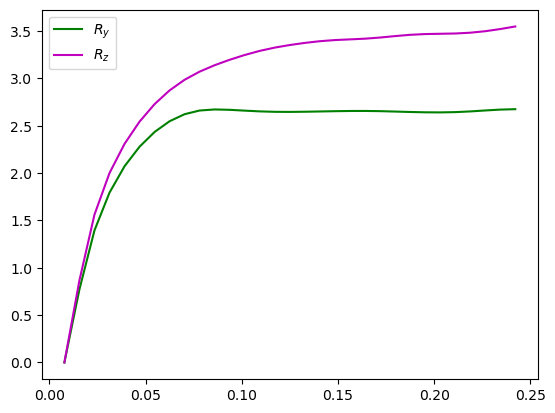

In [29]:
plt.plot(xp[1:], R_y[1:], 'g-', label = r'$R_y$')
plt.plot(xp[1:], R_z[1:], 'm-', label = r'$R_z$')

plt.legend()